In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')

In [ ]:
# Viewing Data: Head
print("First 5 rows of the dataset:\n", data.head())


First 5 rows of the dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Viewing Data: Tail
print("\nLast 5 rows of the dataset:\n", data.tail())


Last 5 rows of the dataset:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [ ]:
# Viewing Data: Sample
print("\nRandom sample of 5 rows from the dataset:\n", data.sample(5))


Random sample of 5 rows from the dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
536   50    0   2       120   219    0        1      158      0      1.6   
265   45    1   0       104   208    0        0      148      1      3.0   
919   38    1   3       120   231    0        1      182      1      3.8   
70    59    1   0       170   326    0        0      140      1      3.4   
899   59    1   0       135   234    0        1      161      0      0.5   

     slope  ca  thal  target  
536      1   0     2       1  
265      1   0     2       1  
919      1   0     3       0  
70       0   0     3       0  
899      1   0     3       1  


In [ ]:
# Step 1: Checking for missing values
print("Checking for missing values before filling:")
print(data.isnull().sum())

Checking for missing values before filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Step 2: Fill missing values using fill forward method
data.fillna(method='ffill', inplace=True)


<ipython-input-9-fd0c8b5ead9d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Verify that there are no more missing values
print("\nChecking for missing values after filling:")
print(data.isnull().sum())


Checking for missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


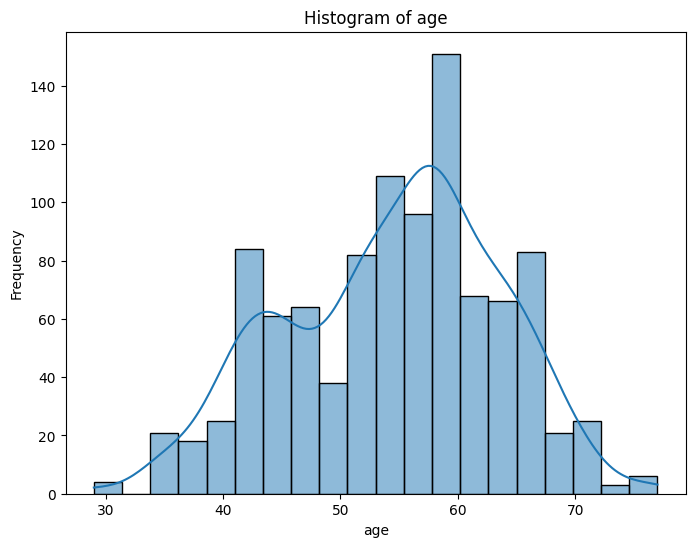

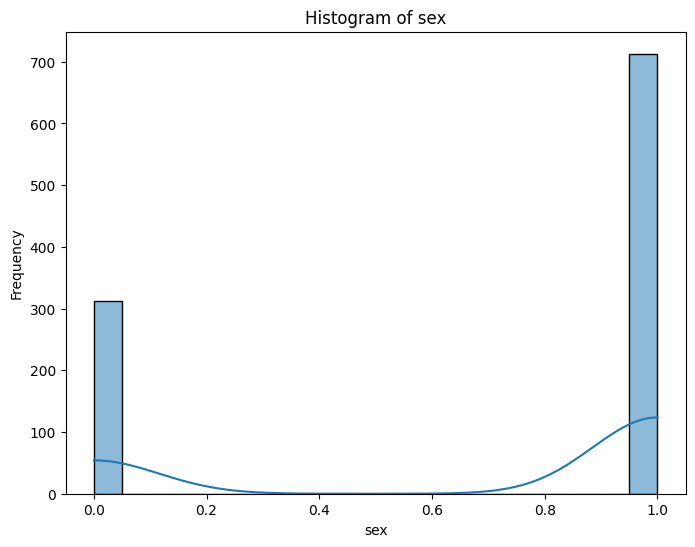

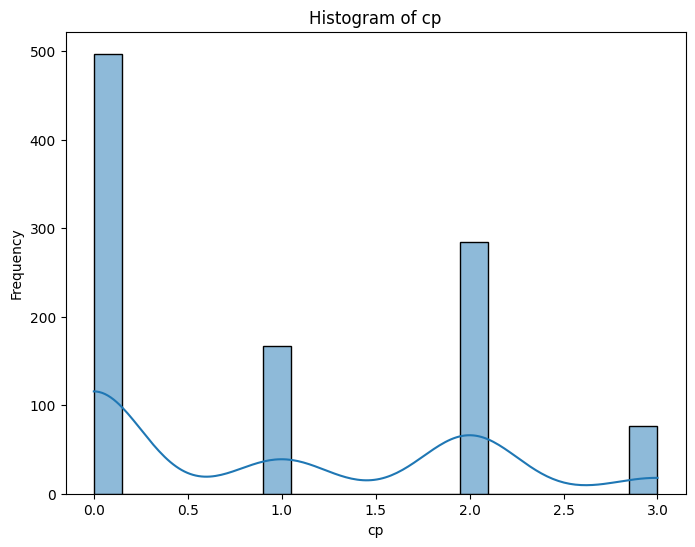

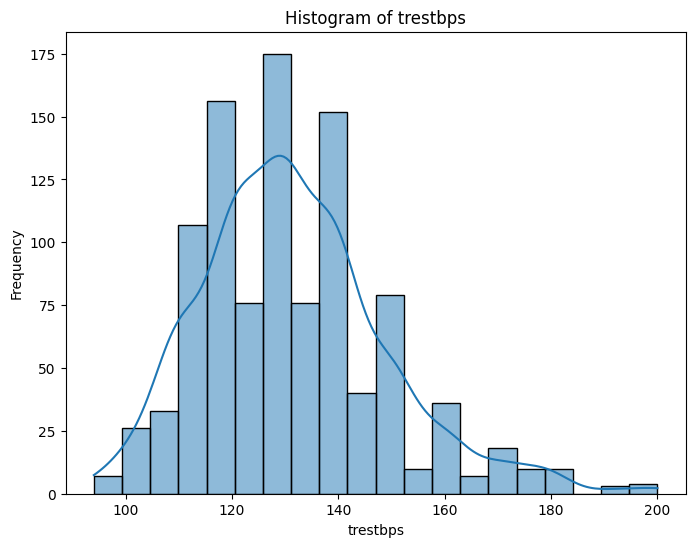

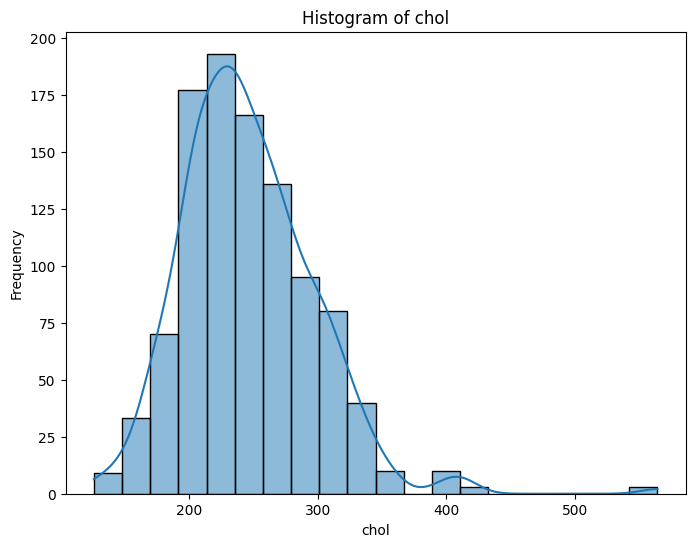

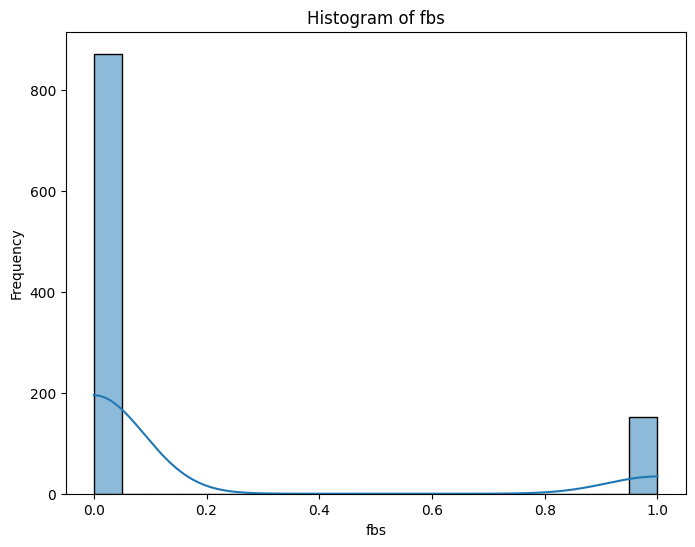

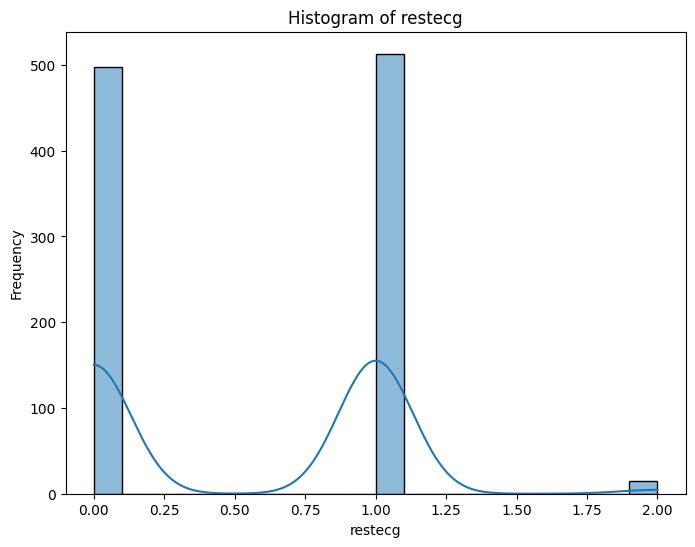

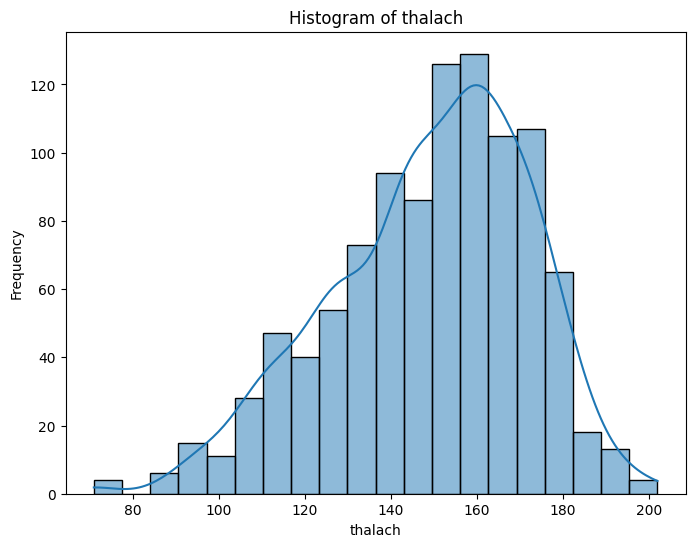

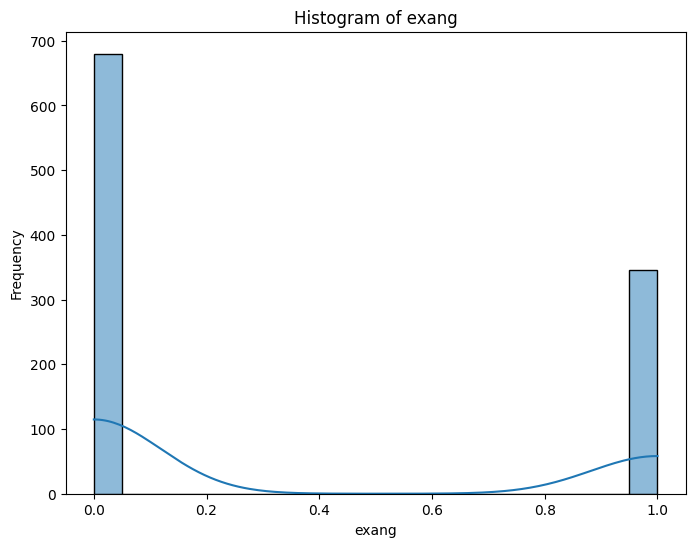

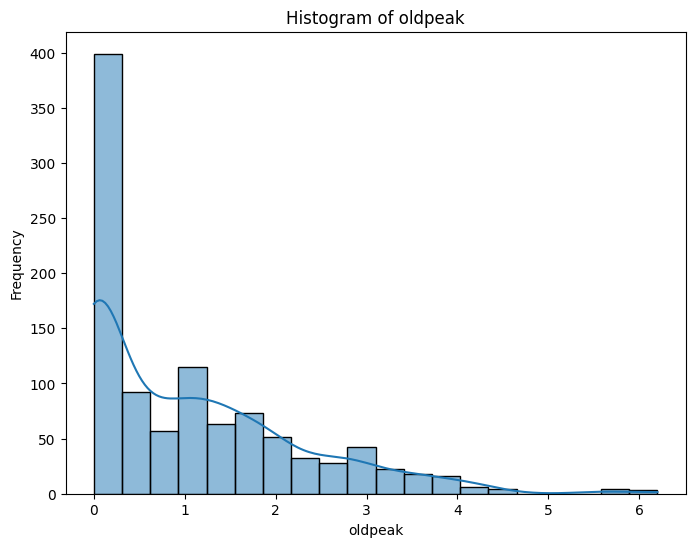

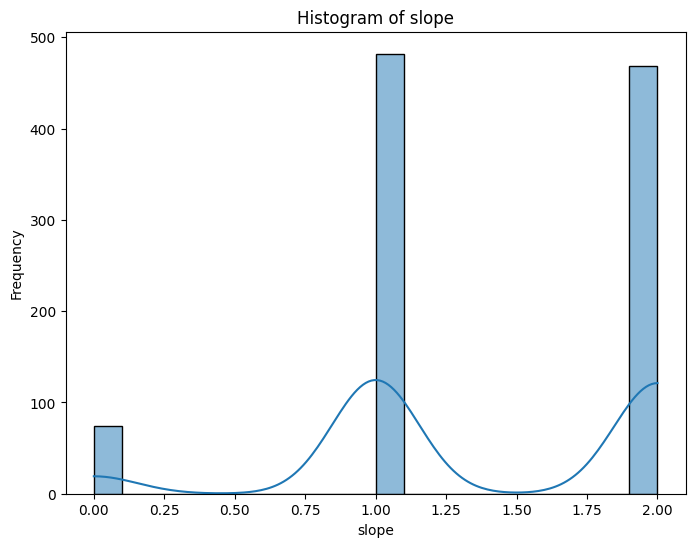

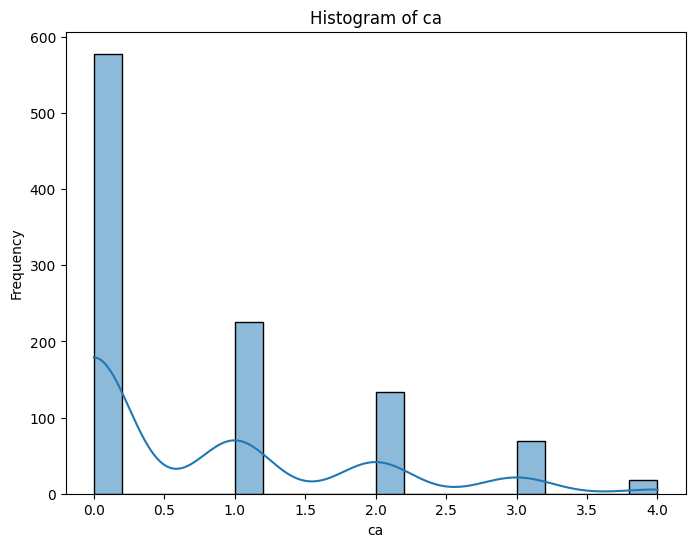

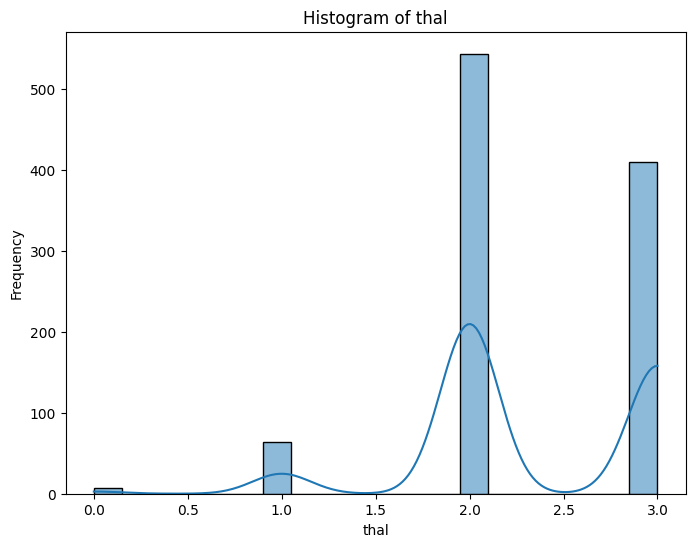

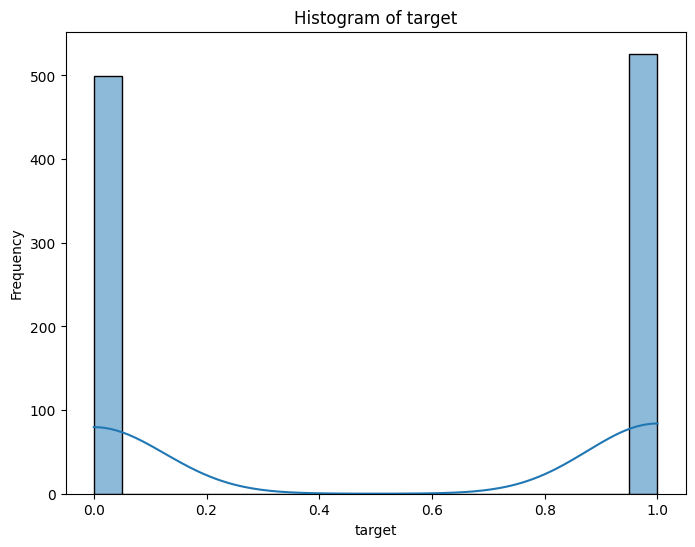

In [ ]:
# Step 1: Plot Histograms for all columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


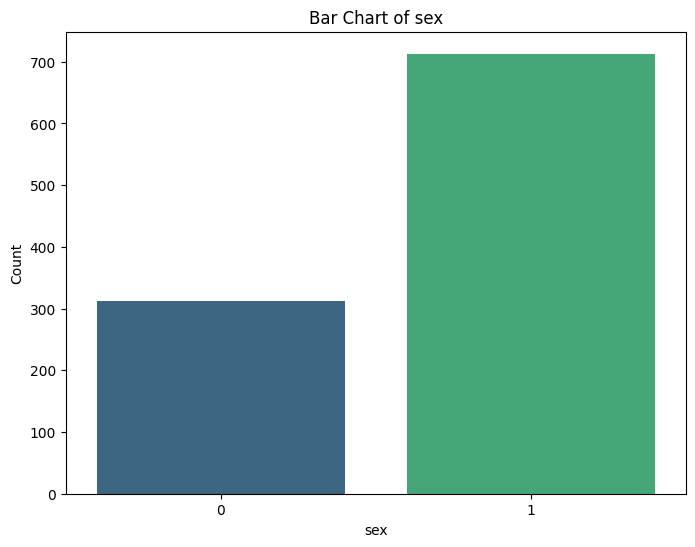

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


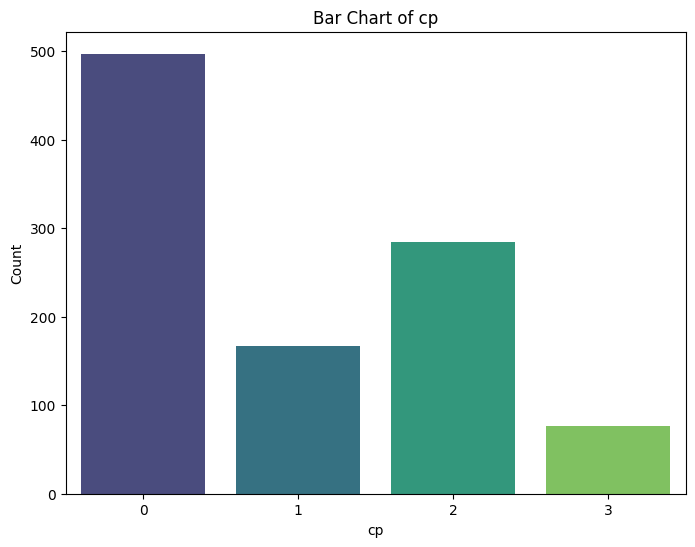

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


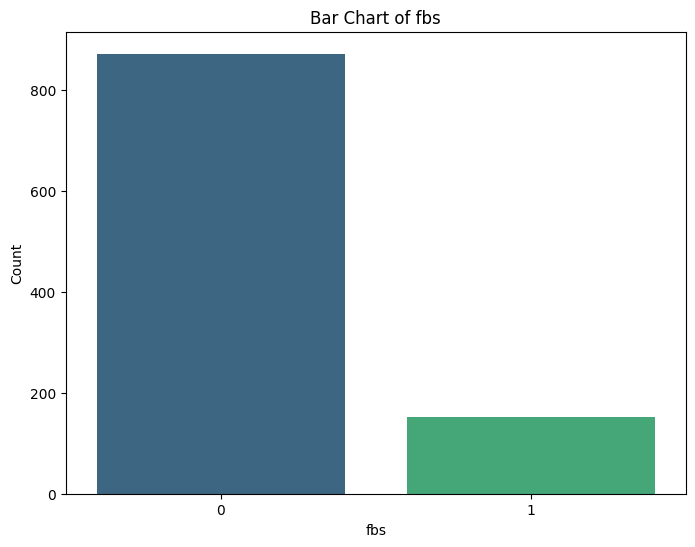

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


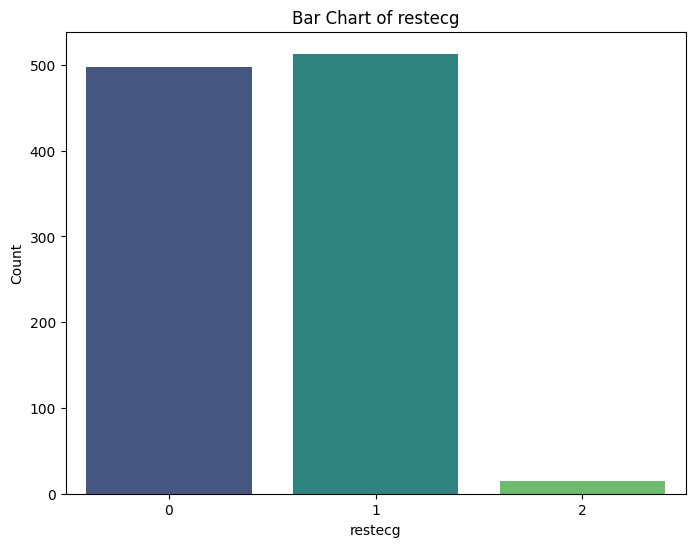

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


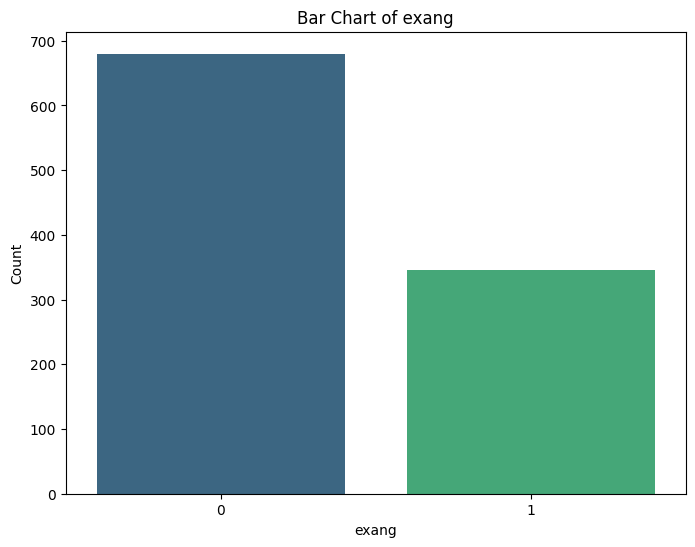

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


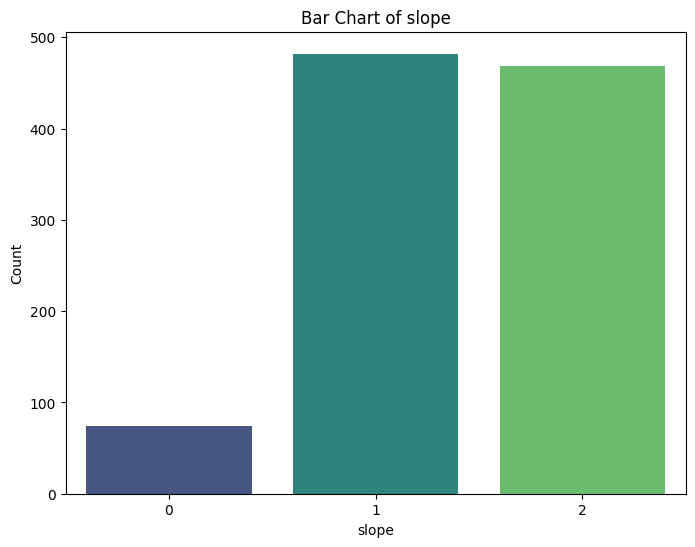

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


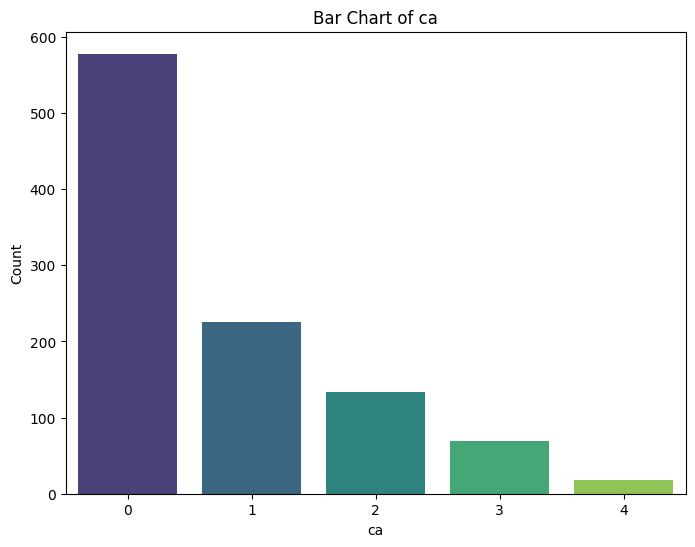

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


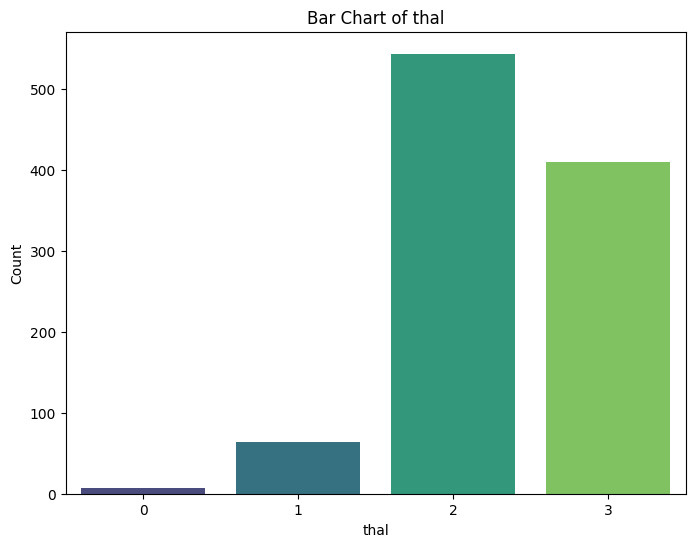

<ipython-input-15-2647ccc9e65a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


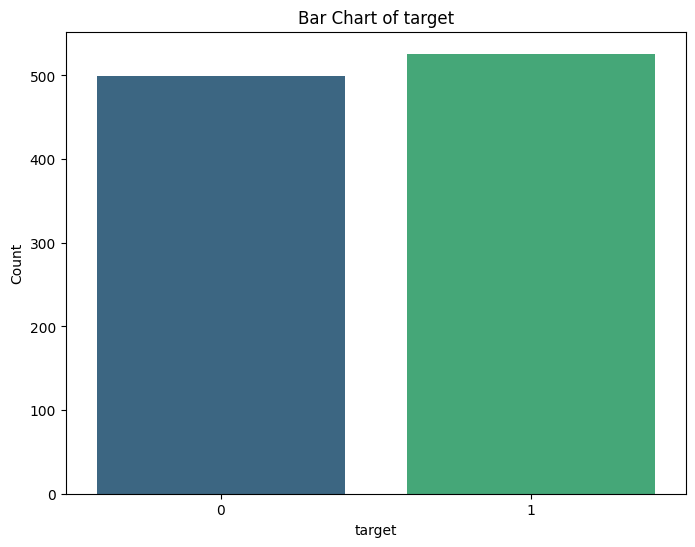

In [ ]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Plot bar chart for each specified categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

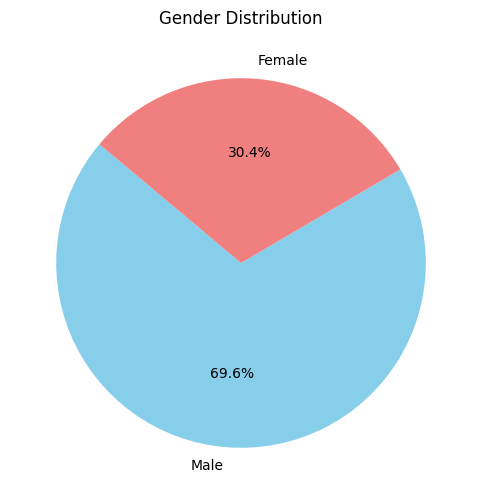

In [ ]:
# Pie chart for Gender distribution
gender_counts = data['sex'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


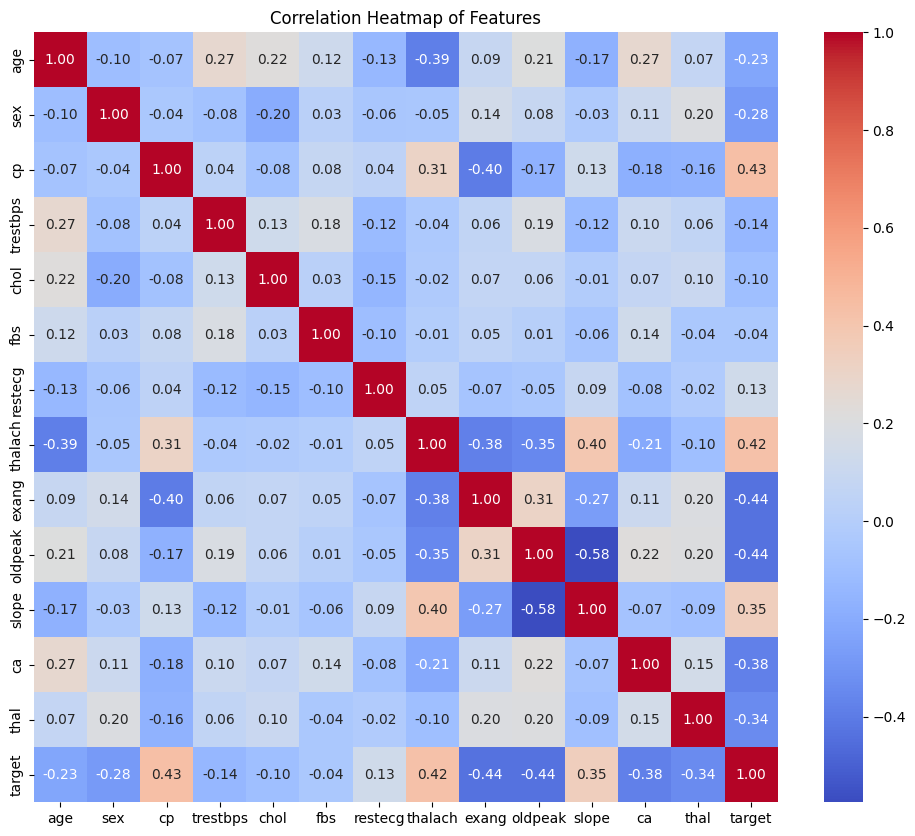


Correlation of each feature with the target:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [ ]:
 #Step 3: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Displaying the correlation with the target variable in descending order
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("\nCorrelation of each feature with the target:\n", target_correlation)

In [ ]:
# Feature Selection and Data Splitting
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Dictionary to store model results
results = {}



In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
results['Logistic Regression'] = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_logistic),
    "Classification Report": classification_report(y_test, y_pred_logistic)
}


In [ ]:
# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf)
}


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors'] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_knn),
    "Classification Report": classification_report(y_test, y_pred_knn)
}

In [ ]:
# 4. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results['Support Vector Machine'] = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm),
    "Classification Report": classification_report(y_test, y_pred_svm)
}

In [ ]:
# Display the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print("Accuracy:", metrics["Accuracy"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("Classification Report:\n", metrics["Classification Report"])


Logistic Regression Results:
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Random Forest Results:
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


K-Nearest Neighbors Results:
Accuracy: 0.8341463414634146
Confusion Matrix:
 [[79 23]
 [11 92]]
Classific

In [ ]:
# Identify the best model based on accuracy
best_model_name = max(results, key=lambda model: results[model]["Accuracy"])
best_model_accuracy = results[best_model_name]["Accuracy"]

# Print the best model and its accuracy
print("\nBest Model Based on Accuracy:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")


NameError: name 'results' is not defined